# House prise prediction

# Importing required libraries

In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Load dataset

In [198]:
df=pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Data preprocessing

In [199]:
df.shape

(4600, 18)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [201]:
df=df.drop(['date','country','statezip','city','street','yr_renovated','view'], axis='columns')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955
1,2384000.0,5.0,2.50,3650,9050,2.0,0,5,3370,280,1921
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976


In [202]:
df=df[df.price>0]
df.shape

(4551, 11)

In [203]:
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(df)

(array([4.536e+03, 1.200e+01, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([7.800000e+03, 2.666020e+06, 5.324240e+06, 7.982460e+06,
        1.064068e+07, 1.329890e+07, 1.595712e+07, 1.861534e+07,
        2.127356e+07, 2.393178e+07, 2.659000e+07]),
 <BarContainer object of 10 artists>)

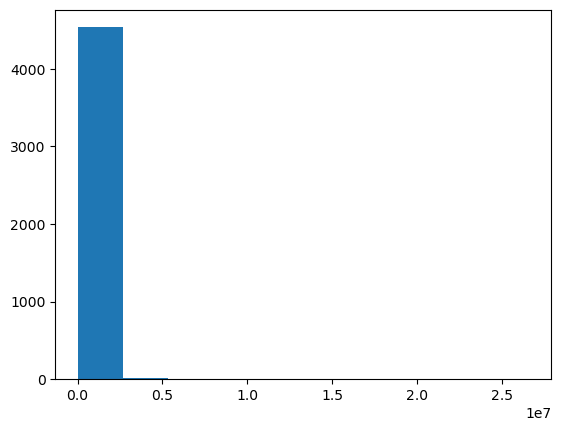

In [204]:
plt.hist(df.price)

(array([   6.,    0.,   31.,    0.,    0., 2851.,    0., 1238.,    0.,
         425.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

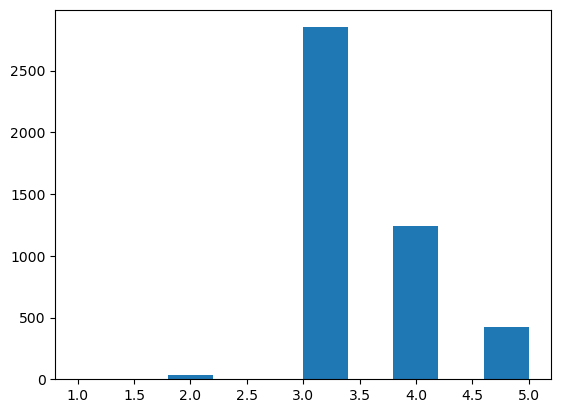

In [205]:
plt.hist(df.condition)

In [206]:
X=df.drop(['price'],axis=1)
X.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built
0,3.0,1.5,1340,7912,1.5,0,3,1340,0,1955
1,5.0,2.5,3650,9050,2.0,0,5,3370,280,1921
2,3.0,2.0,1930,11947,1.0,0,4,1930,0,1966


In [207]:
y=df.price
y.head(3)

0     313000.0
1    2384000.0
2     342000.0
Name: price, dtype: float64

In [208]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [209]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [210]:
y_pred=model.predict(X_test)
y_pred

array([ 250761.58841785,  471590.07205028,  316203.31987754,
        370868.10915509,  704872.61512057,  749768.5063335 ,
        406280.08234208,  421286.8776316 ,  420679.82635905,
       1009869.41886754,  418046.68828941,  815204.68349933,
        336576.50808949,  561172.38892295,  586385.5589174 ,
        461977.09019976,  754773.44606141,  612469.48226749,
        635352.23447425,  308513.06318386, 1443574.5058271 ,
        370336.60288953,  604158.86005078,  561230.45003895,
       1267958.06658576,  557132.10575347,  407509.75555536,
        520697.16249871,  717000.31922811,  265348.87557076,
        643071.42602933,  727345.60457868,  619846.68267852,
        420929.13246064,  203945.39723417,  861107.65868857,
        560872.07628047,  703252.03248859,  473799.67362141,
       1877729.99391332,  462891.06790622,  467704.05230629,
        562965.87804844,  346989.62852774,  748410.83674629,
        481472.11383912,  421250.12535506,  279408.01069373,
        434197.97522498,

In [212]:
model.score(X_test,y_test)

0.5429038969030842